In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving sentiment labelled sentences.zip to sentiment labelled sentences.zip


{'sentiment labelled sentences.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x0f\\\xe5H\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\x00\x10\x00sentiment labelled sentences/UX\x0c\x00D\xfd{W=\xfd{W\xf5\x01\x14\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\x11\\\xe5H\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00&\x00\x10\x00sentiment labelled sentences/.DS_StoreUX\x0c\x00"\xfc{WA\xfd{W\xf5\x01\x14\x00\xed\x981j\xc3@\x10E\xff\xc82\x88\xa4\xd9t.\xb7L\x15\xc8\r\x16c\x17i\x93\x03\xc4V\x94" c\x08\x0e\xa4T\x97+\xe66\xf6\xc8\xf3\t\x0b\xb6\xc1\xael\xe2y\xb0z\x85\xe6\xafV\xcd\xaeF\x00d\xfc\xd5<\x02\x01@\x053~\xb0\x97\x8ac\x87"\xb3l\xe7xE\x8b9j\xbc\xab\x8f\xa3\xcf\xde\xe1\x03\x0b4\x9a\xcb\xf3\xad^\x1b<`\x85o\xac\x9e\xda\xe5[\xdd.k[\xaa<\xab\xefu\x0c\xd6\xeb\xed,7\xf8\xd4\xea\xb9\xd6/\xd4\xfb3\xbf\xcc\x0c\x99q\x1c\xc7q\x9c\xebDL\xd5\xedy\x97\xe18\xce\x05\xd2\xef\x0f\x91Ntg\x16\xde/\xe82\xcb\x04:\xd2\x89\xee\xcc\xc2\xba\x82.\xe9\x8a\x0et\xa4\x13\xdd\x99\xb9i\t\x9b\x0f\xe1\x93\x85\x1d\x8a\x04:\xd2\xe9\x

In [ ]:
from zipfile import ZipFile
filename = '/content/sentiment labelled sentences.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import pandas as pd
dict_filepath = {'yelp': '/content/drive/My Drive/Deep Learning/sentiment labelled sentences/yelp_labelled.txt',
             'amazon-cells' : '/content/drive/My Drive/Deep Learning/sentiment labelled sentences/amazon_cells_labelled.txt',
             'imdb' : '/content/drive/My Drive/Deep Learning/sentiment labelled sentences/imdb_labelled.txt'}
df_list = []
for source, filepath in dict_filepath.items():
  df = pd.read_csv(filepath, names=['sentences','label'],sep='\t')
  df['sources'] = source
  df_list.append(df)
df = pd.concat(df_list)
df.head()

,sentences,label,sources
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [ ]:
df['sources'].value_counts()

yelp            1000
amazon-cells    1000
imdb             748
Name: sources, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for source in df['sources'].unique():
  df_src = df[df['sources'] == source]
  sentences = df['sentences'].values
  y = df['label'].values
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=0)
  
  vectorizer = CountVectorizer()
  X_train = vectorizer.fit_transform(sentences_train)
  X_test = vectorizer.transform(sentences_test)

  # classifier = LogisticRegression()
  classifier = RandomForestClassifier()
  classifier.fit(X_train,y_train)
  score_eval = classifier.score(X_train, y_train)
  score = classifier.score(X_test, y_test)
  print('Accuracy Score of {} data : {:.4f} [{:.4f}]'.format(source, score, score_eval))

Accuracy Score of yelp data : 0.7873 [1.0000]
Accuracy Score of amazon-cells data : 0.8018 [1.0000]
Accuracy Score of imdb data : 0.8127 [1.0000]


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2198, 4602), (550, 4602), (2198,), (550,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras 

In [ ]:
model = Sequential()
model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('Adam','binary_crossentropy',['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                46030     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 46,041
Trainable params: 46,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test,y_test),verbose=False)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy of Training Set : {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Testing Set : {:.4f}'.format(accuracy))

2198/2198 [==============================] - 0s 54us/step
Accuracy of Training Set : 1.0000
550/550 [==============================] - 0s 54us/step
Accuracy of Testing Set : 0.8182


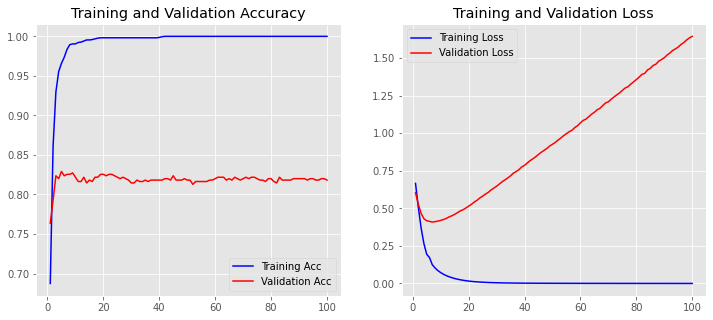

In [ ]:
# visualiztion of history
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1,len(acc)+1)

  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(x, acc, 'b',label='Training Acc')
  plt.plot(x, val_acc,'r',label='Validation Acc')
  plt.title('Training and Validation Accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(x, loss, 'b',label='Training Loss')
  plt.plot(x, val_loss, 'r',label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()


plot_history(history)

# One Hot Encoding

In [ ]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
city_labels = le.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1])

In [ ]:
encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape(5,1)
encoder.fit_transform(city_labels)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Word Embedding

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1
print(sentences_train[2])
print(X_train[2])

As an earlier review noted, plug in this charger and nothing happens.
[25, 46, 1289, 765, 1971, 407, 11, 7, 234, 2, 209, 1972]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from keras.layers import Embedding,Flatten
model = Sequential()
model.add(Embedding(5000, 50, input_length=maxlen))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('Adam','binary_crossentropy',['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 300,021
Trainable params: 300,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20,validation_data=(X_test, y_test),verbose=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8073


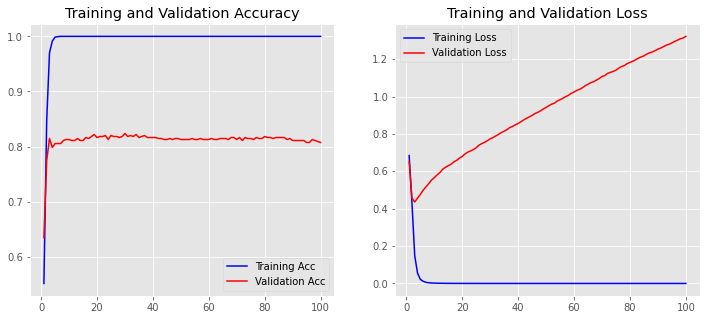

In [ ]:
plot_history(history)

In [ ]:
from keras.layers import GlobalAvgPool1D
model = Sequential()
model.add(Embedding(5000, 50, input_length=maxlen))
model.add(GlobalAvgPool1D())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('Adam','binary_crossentropy',['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 250,521
Trainable params: 250,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20,validation_data=(X_test, y_test),verbose=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9945
Testing Accuracy:  0.8018


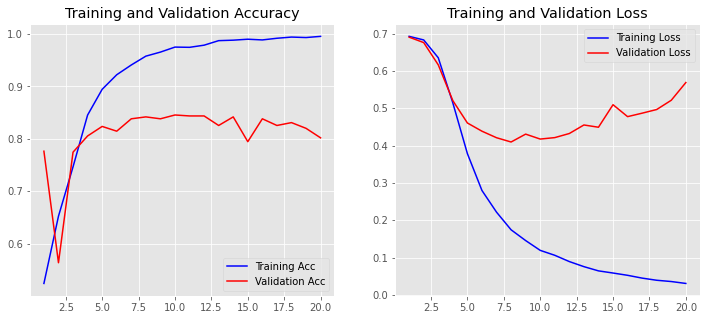

In [ ]:
plot_history(history)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 283,429
Trainable params: 283,429
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 0.9986
Testing Accuracy:  0.7927


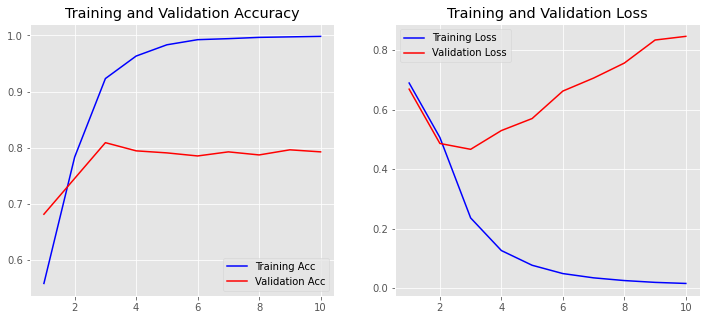

In [ ]:
from keras.layers import Conv1D, GlobalAveragePooling1D
model = Sequential()
model.add(Embedding(5000, 50, input_length=maxlen))
model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('Adam','binary_crossentropy',['accuracy'])
model.summary()

history = model.fit(X_train, y_train, batch_size=10, epochs=10,validation_data=(X_test, y_test),verbose=False)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   137k      0 --:--:-- --:--:-- --:--:--  137k


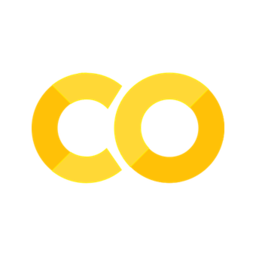

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)